# Exploring Themes of The Complacent Class

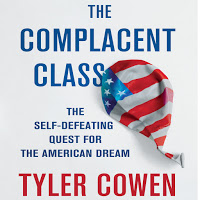

In [76]:
image_path = os.path.abspath(os.path.join(base_path, "..", "reports", "figures"))
Image(filename = image_path + "/unnamed.jpg", width=400, height=400)

Analysis By: John Rogers

Import libraries, set absolute and relative paths, and pull file list to read.

In [108]:
import os as os
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as pyplt
import random as rd
import re as re
from IPython.display import Image
from IPython.core.display import HTML 

In [109]:
%pwd

'/Users/John/Documents/Complacent_Class/The Complacent Class/notebooks'

In [147]:
base_path = os.getcwd()
print(base_path)
file_path = os.path.abspath(os.path.join(base_path, "..", "data", "external"))
print(file_path)

/Users/John/Documents/Complacent_Class/The Complacent Class/notebooks
/Users/John/Documents/Complacent_Class/The Complacent Class/data/external


In [148]:
all_file_list = [f for f in os.listdir(file_path) if os.path.isfile(os.path.join(file_path, f))]
print(all_file_list)
print(len(all_file_list))

['tab-a-1.xls', 'tab-a-3.xls', 'tab-a-2.xls', '.gitkeep', 'tab-a-6.xls', 'tab-a-5.xls', 'tab-a-4.xls']
7


In [149]:
xls_file_list = [f for f in all_file_list if f.endswith(".xls")]
print(xls_file_list)
print(len(xls_file_list))

['tab-a-1.xls', 'tab-a-3.xls', 'tab-a-2.xls', 'tab-a-6.xls', 'tab-a-5.xls', 'tab-a-4.xls']
6


In [150]:
xls_path_list = [os.path.join(file_path, f) for f in xls_file_list]
print(xls_path_list)

['/Users/John/Documents/Complacent_Class/The Complacent Class/data/external/tab-a-1.xls', '/Users/John/Documents/Complacent_Class/The Complacent Class/data/external/tab-a-3.xls', '/Users/John/Documents/Complacent_Class/The Complacent Class/data/external/tab-a-2.xls', '/Users/John/Documents/Complacent_Class/The Complacent Class/data/external/tab-a-6.xls', '/Users/John/Documents/Complacent_Class/The Complacent Class/data/external/tab-a-5.xls', '/Users/John/Documents/Complacent_Class/The Complacent Class/data/external/tab-a-4.xls']


In [151]:
df_list = [pd.read_excel(df) for df in xls_path_list]


In [152]:
file_path_dict = dict(zip(xls_file_list, xls_path_list))
print(file_path_dict)

{'tab-a-1.xls': '/Users/John/Documents/Complacent_Class/The Complacent Class/data/external/tab-a-1.xls', 'tab-a-3.xls': '/Users/John/Documents/Complacent_Class/The Complacent Class/data/external/tab-a-3.xls', 'tab-a-2.xls': '/Users/John/Documents/Complacent_Class/The Complacent Class/data/external/tab-a-2.xls', 'tab-a-6.xls': '/Users/John/Documents/Complacent_Class/The Complacent Class/data/external/tab-a-6.xls', 'tab-a-5.xls': '/Users/John/Documents/Complacent_Class/The Complacent Class/data/external/tab-a-5.xls', 'tab-a-4.xls': '/Users/John/Documents/Complacent_Class/The Complacent Class/data/external/tab-a-4.xls'}


Visually inspect the Migration/Geographic Mobility table A-1 from the Current Population Surevey (CPS).
Reference: https://www.census.gov/topics/population/migration/data/tables.html

In [153]:
df_dict = dict(zip(xls_file_list, df_list))
df_dict["tab-a-1.xls"]

,Table with row headers in column A and column headers in rows 5 through 7.,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
0,"Table A-1. Annual Geographical Mobility Rates,...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,(Numbers in thousands.),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Mobility period,"Total, 1 year old and over",Same residence (non-movers),Total movers,Different residence in the United States,NaN,NaN,NaN,NaN,Movers from abroad
4,NaN,NaN,NaN,NaN,Total,Same county,Different county,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,Total,Same state,Different state,NaN
6,NUMBER,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2017-2018,319319,286967,32352,31186,19852,11334,6496,4838,1165
9,2016-2017,316550,281647,34902,33647,21614,12033,6668,5366,1255


In [154]:
tab_a_1 = df_dict["tab-a-1.xls"]
type(tab_a_1)
print(tab_a_1.columns)
len(tab_a_1.columns)

Index(['Table with row headers in column A and column headers in rows 5 through 7.',
       'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5',
       'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9'],
      dtype='object')


10

Rename columns

In [155]:
a_1_columns = ["Mobility Period",
                   "Total 1 Year Old and Over",
                   "Same Residence - Non-Movers",
                   "Total Movers",
                   "Total - DRUS",
                   "Same County - DRUS",
                   "Total - DRUS DC",
                   "Same State - DRUS DC",
                   "Different State - DRUS DC",
                   "Abroad Movers"]

In [156]:
tab_a_1.columns = a_1_columns
tab_a_1.columns

Index(['Mobility Period', 'Total 1 Year Old and Over',
       'Same Residence - Non-Movers', 'Total Movers', 'Total - DRUS',
       'Same County - DRUS', 'Total - DRUS DC', 'Same State - DRUS DC',
       'Different State - DRUS DC', 'Abroad Movers'],
      dtype='object')

Inspect head, tail, df info and random sample of the data.

In [157]:
display(tab_a_1.head(10))
display(tab_a_1.tail(10))
tab_a_1.info()
sample_index = rd.sample(range(len(tab_a_1.index)), 10)
display(tab_a_1.iloc[sample_index,])

,Mobility Period,Total 1 Year Old and Over,Same Residence - Non-Movers,Total Movers,Total - DRUS,Same County - DRUS,Total - DRUS DC,Same State - DRUS DC,Different State - DRUS DC,Abroad Movers
0,"Table A-1. Annual Geographical Mobility Rates,...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,(Numbers in thousands.),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Mobility period,"Total, 1 year old and over",Same residence (non-movers),Total movers,Different residence in the United States,NaN,NaN,NaN,NaN,Movers from abroad
4,NaN,NaN,NaN,NaN,Total,Same county,Different county,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,Total,Same state,Different state,NaN
6,NUMBER,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2017-2018,319319,286967,32352,31186,19852,11334,6496,4838,1165
9,2016-2017,316550,281647,34902,33647,21614,12033,6668,5366,1255


,Mobility Period,Total 1 Year Old and Over,Same Residence - Non-Movers,Total Movers,Total - DRUS,Same County - DRUS,Total - DRUS DC,Same State - DRUS DC,Different State - DRUS DC,Abroad Movers
176,3/ Population controls consistent with 2000 Ce...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
177,4/ Caution should be used when comparing numbe...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
178,5/ SCHIP sample: poulation controls consistent...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
179,6/ Population controls consistent with 1990 Ce...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
180,7/ Population controls consistent with 1980 Ce...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
181,8/ The 1-year geographic mobility question was...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
182,For more information on the transition from Ce...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
183,Adjustments to Household Survey Population Est...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
184,Population Estimates in January 2012 webpage\n,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
185,"Source: U.S. Census Bureau, Current Populatio...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186 entries, 0 to 185
Data columns (total 10 columns):
Mobility Period                154 non-null object
Total 1 Year Old and Over      137 non-null object
Same Residence - Non-Movers    137 non-null object
Total Movers                   137 non-null object
Total - DRUS                   138 non-null object
Same County - DRUS             137 non-null object
Total - DRUS DC                138 non-null object
Same State - DRUS DC           137 non-null object
Different State - DRUS DC      137 non-null object
Abroad Movers                  137 non-null object
dtypes: object(10)
memory usage: 14.6+ KB


,Mobility Period,Total 1 Year Old and Over,Same Residence - Non-Movers,Total Movers,Total - DRUS,Same County - DRUS,Total - DRUS DC,Same State - DRUS DC,Different State - DRUS DC,Abroad Movers
127,1992-1993 (1980 controls)/7,100,83.2,16.8,16.3,10.5,5.8,3.1,2.7,0.5
18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
113,2001-2002,100,85.2204,14.7796,14.2177,8.52459,5.69313,2.89977,2.79336,0.561907
162,1955-1956,100,78.9,21.1,20.5,13.7,6.8,3.6,3.1,0.6
32,2000-2001 (1990 controls)/6,272671,234029,38641,36993,21783,15210,7531,7679,1648
22,2007-2008,294851,259685,35167,34022,23013,11009,6282,4728,1145
5,NaN,NaN,NaN,NaN,NaN,NaN,Total,Same state,Different state,NaN
35,1998-1999,267933,225297,42636,41207,25268,15939,8423,7516,1429
63,1968-1969,196642,159310,37332,35933,22993,12940,6316,6625,1399
109,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Determine number and location of missing values.

In [158]:
def check_missing_data(df):
    # check for any missing data in the df (display in descending order)
    df_shape = "df shape {}".format(df.shape)
    missing_count = df.isnull().sum().sort_values(ascending=False)
    return missing_count, df_shape

In [159]:
check_missing_data(tab_a_1)

(Abroad Movers                  49
 Different State - DRUS DC      49
 Same State - DRUS DC           49
 Same County - DRUS             49
 Total Movers                   49
 Same Residence - Non-Movers    49
 Total 1 Year Old and Over      49
 Total - DRUS DC                48
 Total - DRUS                   48
 Mobility Period                32
 dtype: int64, 'df shape (186, 10)')

In [160]:
tab_a_1.index.values

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

Remove missing values.

In [161]:
tab_a_1.dropna(how = "all", inplace = True)
print(len(tab_a_1))
print(tab_a_1.isnull().sum())
tab_a_1.index.values

156
Mobility Period                 2
Total 1 Year Old and Over      19
Same Residence - Non-Movers    19
Total Movers                   19
Total - DRUS                   18
Same County - DRUS             19
Total - DRUS DC                18
Same State - DRUS DC           19
Different State - DRUS DC      19
Abroad Movers                  19
dtype: int64


array([  0,   1,   3,   4,   5,   6,   8,   9,  10,  12,  13,  14,  15,
        16,  17,  19,  20,  21,  22,  23,  24,  26,  27,  28,  29,  30,
        31,  32,  34,  35,  36,  37,  38,  40,  41,  42,  43,  44,  45,
        47,  48,  49,  50,  51,  53,  54,  55,  56,  57,  59,  60,  62,
        63,  64,  65,  66,  68,  69,  70,  71,  72,  74,  75,  76,  77,
        78,  80,  81,  82,  83,  84,  86,  87,  88,  90,  92,  93,  94,
        96,  97,  98,  99, 100, 101, 103, 104, 105, 106, 107, 108, 110,
       111, 112, 113, 114, 115, 116, 118, 119, 120, 121, 122, 124, 125,
       126, 127, 128, 129, 131, 132, 133, 134, 135, 137, 138, 139, 140,
       141, 143, 144, 146, 147, 148, 149, 150, 152, 153, 154, 155, 156,
       158, 159, 160, 161, 162, 164, 165, 166, 167, 168, 170, 171, 172,
       173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185])

In [162]:
tab_a_1 = tab_a_1.iloc[6:,]
tab_a_1.head(10)
print(tab_a_1.isnull().sum())

Mobility Period                 0
Total 1 Year Old and Over      14
Same Residence - Non-Movers    14
Total Movers                   14
Total - DRUS                   14
Same County - DRUS             14
Total - DRUS DC                14
Same State - DRUS DC           14
Different State - DRUS DC      14
Abroad Movers                  14
dtype: int64


In [163]:
tab_a_1[tab_a_1["Same Residence - Non-Movers"].isnull()]

,Mobility Period,Total 1 Year Old and Over,Same Residence - Non-Movers,Total Movers,Total - DRUS,Same County - DRUS,Total - DRUS DC,Same State - DRUS DC,Different State - DRUS DC,Abroad Movers
90,PERCENT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
173,Footnotes:,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
174,1/ The 2014 CPS ASEC included redesigned quest...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
175,2/ Population controls consistent with 2010 Ce...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
176,3/ Population controls consistent with 2000 Ce...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
177,4/ Caution should be used when comparing numbe...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
178,5/ SCHIP sample: poulation controls consistent...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
179,6/ Population controls consistent with 1990 Ce...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
180,7/ Population controls consistent with 1980 Ce...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
181,8/ The 1-year geographic mobility question was...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [164]:
drop_index = tab_a_1[tab_a_1["Same Residence - Non-Movers"].isnull()].index.values
print(list(drop_index))

[90, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185]


In [165]:
tab_a_1 = tab_a_1.drop(drop_index)
print(tab_a_1.isnull().sum())

Mobility Period                0
Total 1 Year Old and Over      0
Same Residence - Non-Movers    0
Total Movers                   0
Total - DRUS                   0
Same County - DRUS             0
Total - DRUS DC                0
Same State - DRUS DC           0
Different State - DRUS DC      0
Abroad Movers                  0
dtype: int64


In [166]:
tab_a_1[tab_a_1["Same Residence - Non-Movers"].isnull()]

,Mobility Period,Total 1 Year Old and Over,Same Residence - Non-Movers,Total Movers,Total - DRUS,Same County - DRUS,Total - DRUS DC,Same State - DRUS DC,Different State - DRUS DC,Abroad Movers


In [167]:
tab_a_1.head(10)

,Mobility Period,Total 1 Year Old and Over,Same Residence - Non-Movers,Total Movers,Total - DRUS,Same County - DRUS,Total - DRUS DC,Same State - DRUS DC,Different State - DRUS DC,Abroad Movers
8,2017-2018,319319,286967,32352,31186,19852,11334,6496,4838,1165
9,2016-2017,316550,281647,34902,33647,21614,12033,6668,5366,1255
10,2015-2016,314992,279854,35138,33857,21588,12269,7501,4768,1281
12,2014-2015,312295,275971,36324,34651,22905,11746,6653,5093,1673
13,"2013-2014 (98,000 address file)/1",309601,273920,35681,34548,23436,11112,6446,4666,1133
14,2012-2013,307243,271325,35918,34882,23150,11731,6961,4770,1036
15,2011-2012,304924,268436,36488,35334,23493,11842,6782,5059,1154
16,2010-2011 (2010 controls)/2,302640,267602,35038,33953,23330,10623,5868,4756,1084
17,2010-2011 (2000 controls)/3,302005,266930,35075,34016,23325,10691,5912,4779,1058
19,2009-2010 (2010 controls)/2,300419,262975,37445,36459,25910,10549,6227,4323,985


In [168]:
tab_a_1.describe()

,Mobility Period,Total 1 Year Old and Over,Same Residence - Non-Movers,Total Movers,Total - DRUS,Same County - DRUS,Total - DRUS DC,Same State - DRUS DC,Different State - DRUS DC,Abroad Movers
count,136,136,136.0,136.0,136.0,136.0,136.0,136.0,136.0,136.0
unique,68,68,120.0,120.0,119.0,115.0,96.0,90.0,92.0,76.0
top,1991-1992,100,88.4,17.0,19.4,13.1,6.6,3.3,3.0,0.5
freq,2,68,3.0,3.0,3.0,5.0,7.0,11.0,8.0,22.0


In [169]:
tab_a_1[tab_a_1["Mobility Period"] == "2017-2018"]

,Mobility Period,Total 1 Year Old and Over,Same Residence - Non-Movers,Total Movers,Total - DRUS,Same County - DRUS,Total - DRUS DC,Same State - DRUS DC,Different State - DRUS DC,Abroad Movers
8,2017-2018,319319,286967,32352,31186,19852,11334,6496,4838,1165
92,2017-2018,100,89.9,10.1,9.8,6.2,3.6,2,1.5,0.4


Split percentages and levels in the data set.

In [170]:
ta1_mob_per_group = tab_a_1.groupby("Mobility Period")
ta1_mob_per_group["Total Movers"].count()

Mobility Period
1947-1948                             2
1948-1949                             2
1949-1950                             2
1950-1951                             2
1951-1952                             2
1952-1953                             2
1953-1954                             2
1954-1955                             2
1955-1956                             2
1956-1957                             2
1957-1958                             2
1958-1959                             2
1959-1960                             2
1960-1961                             2
1961-1962                             2
1962-1963                             2
1963-1964                             2
1964-1965                             2
1965-1966                             2
1966-1967                             2
1967-1968                             2
1968-1969                             2
1969-1970                             2
1970-1971/8                           2
1975-1976/8             

In [171]:
tab_a_1[(tab_a_1.index.values >= 80) & (tab_a_1.index.values <= 99)]

,Mobility Period,Total 1 Year Old and Over,Same Residence - Non-Movers,Total Movers,Total - DRUS,Same County - DRUS,Total - DRUS DC,Same State - DRUS DC,Different State - DRUS DC,Abroad Movers
80,1954-1955,158609,126190,32419,31492,21086,10406,5511,4895,927
81,1953-1954,155679,125654,30025,29027,19046,9981,4947,5034,998
82,1952-1953,153038,121512,31526,30786,20638,10148,4626,5522,740
83,1951-1952,150494,120016,30478,29840,19874,9966,4854,5112,638
84,1950-1951,148400,116936,31464,31158,20694,10464,5276,5188,306
86,1949-1950,146864,118849,28015,27526,19276,8250,4360,3889,491
87,1948-1949,144101,116498,27603,27127,18792,8335,3992,4344,476
88,1947-1948,141698,113026,28672,28210,19202,9008,4638,4370,462
92,2017-2018,100,89.9,10.1,9.8,6.2,3.6,2,1.5,0.4
93,2016-2017,100,89,11,10.6,6.8,3.8,2.1,1.7,0.4


In [172]:
tab_a_1_level = tab_a_1[tab_a_1.index.values <= 88]
tab_a_1_rate = tab_a_1[tab_a_1.index.values >= 92]

In [173]:
tab_a_1_level.describe(include = "all")

,Mobility Period,Total 1 Year Old and Over,Same Residence - Non-Movers,Total Movers,Total - DRUS,Same County - DRUS,Total - DRUS DC,Same State - DRUS DC,Different State - DRUS DC,Abroad Movers
count,68,68,68,68,68,68,68,68,68,68
unique,68,67,68,68,68,68,67,68,68,64
top,1991-1992,275611,133501,43391,40974,22399,14772,7550,7679,978
freq,1,2,1,1,1,1,2,1,1,2


In [174]:
tab_a_1_rate.describe(include = "all")

,Mobility Period,Total 1 Year Old and Over,Same Residence - Non-Movers,Total Movers,Total - DRUS,Same County - DRUS,Total - DRUS DC,Same State - DRUS DC,Different State - DRUS DC,Abroad Movers
count,68,68,68.0,68.0,68.0,68.0,68.0,68.0,68.0,68.0
unique,68,1,52.0,52.0,51.0,47.0,29.0,22.0,24.0,12.0
top,1991-1992,100,83.0,11.6,19.4,13.1,6.6,3.3,3.0,0.5
freq,1,68,3.0,3.0,3.0,5.0,7.0,11.0,8.0,22.0


Clean "Mobility Period" column values.

In [175]:
def create_new_series(df, col_name):
    sLength = len(df[col_name])
    new_col = pd.Series(np.random.randn(sLength), index = df.index)
    return new_col

In [176]:
def strip_strings(df, col_name, split_on):
    new_col = create_new_series(df, col_name)
    new_col = df[col_name].str.split(split_on).str[0]
    df[col_name] = new_col
    return df

In [177]:
tab_a_1.shape

(136, 10)

In [178]:
strip_strings(tab_a_1_level, "Mobility Period", " ")
strip_strings(tab_a_1_level, "Mobility Period", "/")

/Users/John/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


,Mobility Period,Total 1 Year Old and Over,Same Residence - Non-Movers,Total Movers,Total - DRUS,Same County - DRUS,Total - DRUS DC,Same State - DRUS DC,Different State - DRUS DC,Abroad Movers
8,2017-2018,319319,286967,32352,31186,19852,11334,6496,4838,1165
9,2016-2017,316550,281647,34902,33647,21614,12033,6668,5366,1255
10,2015-2016,314992,279854,35138,33857,21588,12269,7501,4768,1281
12,2014-2015,312295,275971,36324,34651,22905,11746,6653,5093,1673
13,2013-2014,309601,273920,35681,34548,23436,11112,6446,4666,1133
14,2012-2013,307243,271325,35918,34882,23150,11731,6961,4770,1036
15,2011-2012,304924,268436,36488,35334,23493,11842,6782,5059,1154
16,2010-2011,302640,267602,35038,33953,23330,10623,5868,4756,1084
17,2010-2011,302005,266930,35075,34016,23325,10691,5912,4779,1058
19,2009-2010,300419,262975,37445,36459,25910,10549,6227,4323,985


In [180]:
strip_strings(tab_a_1_rate, "Mobility Period", " ")
strip_strings(tab_a_1_rate, "Mobility Period", "/")

/Users/John/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


,Mobility Period,Total 1 Year Old and Over,Same Residence - Non-Movers,Total Movers,Total - DRUS,Same County - DRUS,Total - DRUS DC,Same State - DRUS DC,Different State - DRUS DC,Abroad Movers
92,2017-2018,100,89.9,10.1,9.8,6.2,3.6,2,1.5,0.4
93,2016-2017,100,89,11,10.6,6.8,3.8,2.1,1.7,0.4
94,2015-2016,100,88.8,11.2,10.7,6.9,3.9,2.4,1.5,0.4
96,2014-2015,100,88.4,11.6,11.1,7.3,3.8,2.1,1.6,0.5
97,2013-2014,100,88.5,11.5,11.2,7.6,3.6,2.1,1.5,0.4
98,2012-2013,100,88.3,11.7,11.4,7.5,3.8,2.3,1.6,0.3
99,2011-2012,100,88,12,11.6,7.7,3.9,2.2,1.7,0.4
100,2010-2011,100,88.4,11.6,11.2,7.7,3.5,1.9,1.6,0.4
101,2010-2011,100,88.4,11.6,11.3,7.7,3.5,2,1.6,0.4
103,2009-2010,100,87.5,12.5,12.1,8.6,3.5,2.1,1.4,0.3


Identify records to be clarified.

In [215]:
tab_a_1_level_mob_per_group = tab_a_1_level.groupby("l_Mobility_Period")
tab_a_1_level_mob_per_group["l_Total Movers"].count()
tab_a_1_level_mob_per_group.filter(lambda x: x["l_Total Movers"].count() > 1)

,l_Mobility_Period,l_Total 1 Year Old and Over,l_Same Residence - Non-Movers,l_Total Movers,l_Total - DRUS,l_Same County - DRUS,l_Total - DRUS DC,l_Same State - DRUS DC,l_Different State - DRUS DC,l_Abroad Movers
16,2010-2011,302640,267602,35038,33953,23330,10623,5868,4756,1084
17,2010-2011,302005,266930,35075,34016,23325,10691,5912,4779,1058
19,2009-2010,300419,262975,37445,36459,25910,10549,6227,4323,985
20,2009-2010,300074,262534,37540,36594,26017,10577,6252,4326,946
30,2000-2001,275611,236605,39007,37251,21918,15333,7550,7783,1756
31,2000-2001,275611,235726,39885,38133,22774,15360,7778,7582,1752
32,2000-2001,272671,234029,38641,36993,21783,15210,7531,7679,1648
42,1992-1993,252799,209700,43099,41704,26932,14772,7855,6916,1395
43,1992-1993,250210,208162,42048,40743,26212,14532,7735,6797,1305


In [ ]:
df_a_1 = pd.merge(tab_a_1_level, tab_a_1_rate, left_on = "l_Mobility_Period", right_on = "r_Mobility_Period")
display(df_a_1.head(10))

Rename and re-order columns.

In [187]:
l_col = ['l_Mobility_Period',
        'l_Total 1 Year Old and Over',
        'l_Same Residence - Non-Movers',
        'l_Total Movers',
        'l_Total - DRUS',
        'l_Same County - DRUS',
        'l_Total - DRUS DC',
        'l_Same State - DRUS DC',
       'l_Different State - DRUS DC',
        'l_Abroad Movers']
r_col = ['r_Mobility_Period',
        'r_Total 1 Year Old and Over',
        'r_Same Residence - Non-Movers',
        'r_Total Movers',
        'r_Total - DRUS',
        'r_Same County - DRUS',
        'r_Total - DRUS DC',
        'r_Same State - DRUS DC',
        'r_Different State - DRUS DC',
        'r_Abroad Movers']

In [188]:
tab_a_1_level.columns = l_col
tab_a_1_rate.columns = r_col

In [190]:
df_a_1 = pd.merge(tab_a_1_level, tab_a_1_rate, left_on = "l_Mobility_Period", right_on = "r_Mobility_Period")
display(df_a_1.head(10))

,l_Mobility_Period,l_Total 1 Year Old and Over,l_Same Residence - Non-Movers,l_Total Movers,l_Total - DRUS,l_Same County - DRUS,l_Total - DRUS DC,l_Same State - DRUS DC,l_Different State - DRUS DC,l_Abroad Movers,r_Mobility_Period,r_Total 1 Year Old and Over,r_Same Residence - Non-Movers,r_Total Movers,r_Total - DRUS,r_Same County - DRUS,r_Total - DRUS DC,r_Same State - DRUS DC,r_Different State - DRUS DC,r_Abroad Movers
0,2017-2018,319319,286967,32352,31186,19852,11334,6496,4838,1165,2017-2018,100,89.9,10.1,9.8,6.2,3.6,2,1.5,0.4
1,2016-2017,316550,281647,34902,33647,21614,12033,6668,5366,1255,2016-2017,100,89,11,10.6,6.8,3.8,2.1,1.7,0.4
2,2015-2016,314992,279854,35138,33857,21588,12269,7501,4768,1281,2015-2016,100,88.8,11.2,10.7,6.9,3.9,2.4,1.5,0.4
3,2014-2015,312295,275971,36324,34651,22905,11746,6653,5093,1673,2014-2015,100,88.4,11.6,11.1,7.3,3.8,2.1,1.6,0.5
4,2013-2014,309601,273920,35681,34548,23436,11112,6446,4666,1133,2013-2014,100,88.5,11.5,11.2,7.6,3.6,2.1,1.5,0.4
5,2012-2013,307243,271325,35918,34882,23150,11731,6961,4770,1036,2012-2013,100,88.3,11.7,11.4,7.5,3.8,2.3,1.6,0.3
6,2011-2012,304924,268436,36488,35334,23493,11842,6782,5059,1154,2011-2012,100,88,12,11.6,7.7,3.9,2.2,1.7,0.4
7,2010-2011,302640,267602,35038,33953,23330,10623,5868,4756,1084,2010-2011,100,88.4,11.6,11.2,7.7,3.5,1.9,1.6,0.4
8,2010-2011,302640,267602,35038,33953,23330,10623,5868,4756,1084,2010-2011,100,88.4,11.6,11.3,7.7,3.5,2,1.6,0.4
9,2010-2011,302005,266930,35075,34016,23325,10691,5912,4779,1058,2010-2011,100,88.4,11.6,11.2,7.7,3.5,1.9,1.6,0.4


In [216]:
def drop_multiple_col(col_names_list, df): 
    '''
    AIM    -> Drop multiple columns based on their column names 
    
    INPUT  -> List of column names, df
    
    OUTPUT -> updated df with dropped columns 
    ------
    '''
    df.drop(col_names_list, axis=1, inplace=True)
    return df

In [193]:
drop_cols = ["r_Mobility_Period", "r_Total 1 Year Old and Over"]
drop_multiple_col(drop_cols, df_a_1)

,l_Mobility_Period,l_Total 1 Year Old and Over,l_Same Residence - Non-Movers,l_Total Movers,l_Total - DRUS,l_Same County - DRUS,l_Total - DRUS DC,l_Same State - DRUS DC,l_Different State - DRUS DC,l_Abroad Movers,r_Same Residence - Non-Movers,r_Total Movers,r_Total - DRUS,r_Same County - DRUS,r_Total - DRUS DC,r_Same State - DRUS DC,r_Different State - DRUS DC,r_Abroad Movers
0,2017-2018,319319,286967,32352,31186,19852,11334,6496,4838,1165,89.9,10.1,9.8,6.2,3.6,2,1.5,0.4
1,2016-2017,316550,281647,34902,33647,21614,12033,6668,5366,1255,89,11,10.6,6.8,3.8,2.1,1.7,0.4
2,2015-2016,314992,279854,35138,33857,21588,12269,7501,4768,1281,88.8,11.2,10.7,6.9,3.9,2.4,1.5,0.4
3,2014-2015,312295,275971,36324,34651,22905,11746,6653,5093,1673,88.4,11.6,11.1,7.3,3.8,2.1,1.6,0.5
4,2013-2014,309601,273920,35681,34548,23436,11112,6446,4666,1133,88.5,11.5,11.2,7.6,3.6,2.1,1.5,0.4
5,2012-2013,307243,271325,35918,34882,23150,11731,6961,4770,1036,88.3,11.7,11.4,7.5,3.8,2.3,1.6,0.3
6,2011-2012,304924,268436,36488,35334,23493,11842,6782,5059,1154,88,12,11.6,7.7,3.9,2.2,1.7,0.4
7,2010-2011,302640,267602,35038,33953,23330,10623,5868,4756,1084,88.4,11.6,11.2,7.7,3.5,1.9,1.6,0.4
8,2010-2011,302640,267602,35038,33953,23330,10623,5868,4756,1084,88.4,11.6,11.3,7.7,3.5,2,1.6,0.4
9,2010-2011,302005,266930,35075,34016,23325,10691,5912,4779,1058,88.4,11.6,11.2,7.7,3.5,1.9,1.6,0.4


Summarise data.

Identify potential relationships among variables.

In [198]:
df_a_1.describe()

,l_Mobility_Period,l_Total 1 Year Old and Over,l_Same Residence - Non-Movers,l_Total Movers,l_Total - DRUS,l_Same County - DRUS,l_Total - DRUS DC,l_Same State - DRUS DC,l_Different State - DRUS DC,l_Abroad Movers,r_Same Residence - Non-Movers,r_Total Movers,r_Total - DRUS,r_Same County - DRUS,r_Total - DRUS DC,r_Same State - DRUS DC,r_Different State - DRUS DC,r_Abroad Movers
count,80,80,80,80,80,80,80,80,80,80,80.0,80.0,80.0000,80.0,80.0,80.0,80.0,80.0
unique,63,67,68,68,68,68,67,68,68,64,52.0,52.0,51.0000,47.0,29.0,22.0,24.0,12.0
top,2000-2001,275611,236605,39007,36993,21918,15360,7550,7679,1648,87.5,12.5,13.8173,7.7,3.5,3.3,3.0,0.5
freq,9,6,3,3,3,3,3,3,3,3,5.0,5.0,3.0000,5.0,8.0,11.0,8.0,23.0


In [199]:
df_a_1 = df_a_1.infer_objects()
df_a_1.corr()

,l_Total 1 Year Old and Over,l_Same Residence - Non-Movers,l_Total Movers,l_Total - DRUS,l_Same County - DRUS,l_Total - DRUS DC,l_Same State - DRUS DC,l_Different State - DRUS DC,l_Abroad Movers,r_Same Residence - Non-Movers,r_Total Movers,r_Total - DRUS,r_Same County - DRUS,r_Total - DRUS DC,r_Same State - DRUS DC,r_Different State - DRUS DC,r_Abroad Movers
l_Total 1 Year Old and Over,1.000000,0.997520,0.423584,0.399051,0.347664,0.335875,0.544455,0.084065,0.536264,0.942543,-0.942543,-0.945486,-0.947278,-0.803077,-0.738351,-0.804401,-0.194785
l_Same Residence - Non-Movers,0.997520,1.000000,0.358779,0.333680,0.292902,0.278526,0.490433,0.031992,0.502812,0.962816,-0.962816,-0.964823,-0.957947,-0.835993,-0.777398,-0.830786,-0.228577
l_Total Movers,0.423584,0.358779,1.000000,0.997675,0.841012,0.869678,0.908543,0.703149,0.640592,0.108235,-0.108235,-0.121428,-0.233691,0.109118,0.213378,0.024545,0.358637
l_Total - DRUS,0.399051,0.333680,0.997675,1.000000,0.866234,0.846950,0.895221,0.674673,0.586764,0.080631,-0.080631,-0.091892,-0.196540,0.119234,0.233796,0.027057,0.319329
l_Same County - DRUS,0.347664,0.292902,0.841012,0.866234,1.000000,0.468014,0.621326,0.250109,0.232399,0.062561,-0.062561,-0.061300,-0.055717,-0.067920,0.089681,-0.180355,0.020493
l_Total - DRUS DC,0.335875,0.278526,0.869678,0.846950,0.468014,1.000000,0.922236,0.927165,0.790541,0.076065,-0.076065,-0.097326,-0.288357,0.283146,0.318062,0.239756,0.543008
l_Same State - DRUS DC,0.544455,0.490433,0.908543,0.895221,0.621326,0.922236,1.000000,0.710214,0.708378,0.283911,-0.283911,-0.297920,-0.441624,0.022034,0.153144,-0.077363,0.292007
l_Different State - DRUS DC,0.084065,0.031992,0.703149,0.674673,0.250109,0.927165,0.710214,1.000000,0.753041,-0.136528,0.136528,0.111388,-0.097191,0.494128,0.430638,0.511456,0.705736
l_Abroad Movers,0.536264,0.502812,0.640592,0.586764,0.232399,0.790541,0.708378,0.753041,1.000000,0.377120,-0.377120,-0.406980,-0.561821,-0.046492,-0.098470,-0.012825,0.663334
r_Same Residence - Non-Movers,0.942543,0.962816,0.108235,0.080631,0.062561,0.076065,0.283911,-0.136528,0.377120,1.000000,-1.000000,-0.999293,-0.968017,-0.911607,-0.880099,-0.880416,-0.326233


A mapping between raw table column names, dataframe column names, and graph labels.

<html><head>
</head>

<body>
<table cellspacing="0" border="0">
	<colgroup span="10" width="86"></colgroup>
	<tbody><tr>
		<td style="border-top: 1px solid #000000; border-bottom: 1px solid #000000; border-left: 1px solid #000000; border-right: 1px solid #000000" rowspan="3" height="79" align="center" valign="bottom"><font color="#000000">Mobility period</font></td>
		<td style="border-top: 1px solid #000000; border-bottom: 1px solid #000000; border-left: 1px solid #000000; border-right: 1px solid #000000" rowspan="3" align="center" valign="bottom"><font color="#000000">Total, 1 year old and over</font></td>
		<td style="border-top: 1px solid #000000; border-bottom: 1px solid #000000; border-left: 1px solid #000000; border-right: 1px solid #000000" rowspan="3" align="center" valign="bottom"><font color="#000000">Same residence (non-movers)</font></td>
		<td style="border-top: 1px solid #000000; border-bottom: 1px solid #000000; border-left: 1px solid #000000; border-right: 1px solid #000000" rowspan="3" align="center" valign="bottom"><font color="#000000">Total movers</font></td>
		<td style="border-top: 1px solid #000000; border-bottom: 1px solid #000000; border-right: 1px solid #000000" colspan="5" align="center" valign="bottom"><font color="#000000">Different residence in the United States</font></td>
		<td style="border-top: 1px solid #000000; border-bottom: 1px solid #000000; border-left: 1px solid #000000; border-right: 1px solid #000000" rowspan="3" align="center" valign="bottom"><font color="#000000">Movers from abroad</font></td>
	</tr>
	<tr>
		<td style="border-top: 1px solid #000000; border-bottom: 1px solid #000000; border-left: 1px solid #000000; border-right: 1px solid #000000" rowspan="2" align="center" valign="bottom"><font color="#000000">Total</font></td>
		<td style="border-top: 1px solid #000000; border-bottom: 1px solid #000000; border-left: 1px solid #000000; border-right: 1px solid #000000" rowspan="2" align="center" valign="bottom"><font color="#000000">Same county</font></td>
		<td style="border-bottom: 1px solid #000000; border-right: 1px solid #000000" colspan="3" align="center" valign="bottom"><font color="#000000">Different county</font></td>
		</tr>
	<tr>
		<td style="border-top: 1px solid #000000; border-bottom: 1px solid #000000; border-left: 1px solid #000000; border-right: 1px solid #000000" align="center" valign="bottom"><font color="#000000">Total</font></td>
		<td style="border-top: 1px solid #000000; border-bottom: 1px solid #000000; border-left: 1px solid #000000; border-right: 1px solid #000000" align="center" valign="bottom"><font face="Arial" size="2">Same state</font></td>
		<td style="border-top: 1px solid #000000; border-bottom: 1px solid #000000; border-left: 1px solid #000000; border-right: 1px solid #000000" align="center" valign="bottom"><font face="Arial" size="2">Different state</font></td>
		</tr>
	<tr>
		<td height="21" align="left" valign="bottom"><font color="#000000"><br></font></td>
		<td align="left" valign="bottom"><b><font face="Helvetica" color="#000000">l_Total, 1 year old and over</font></b></td>
		<td align="left" valign="bottom"><b><font face="Helvetica" color="#000000">r_Same Residence - Non-Movers</font></b></td>
		<td align="left" valign="bottom"><b><font face="Helvetica" color="#000000">r_Total Movers</font></b></td>
		<td align="left" valign="bottom"><b><font face="Helvetica" color="#000000">r_Total - DRUS</font></b></td>
		<td align="left" valign="bottom"><b><font face="Helvetica" color="#000000">r_Same County - DRUS</font></b></td>
		<td align="left" valign="bottom"><b><font face="Helvetica" color="#000000">r_Total - DRUS DC</font></b></td>
		<td align="left" valign="bottom"><b><font face="Helvetica" color="#000000">r_Same State - DRUS DC</font></b></td>
		<td align="left" valign="bottom"><b><font face="Helvetica" color="#000000">r_Different State - DRUS DC</font></b></td>
		<td align="left" valign="bottom"><b><font face="Helvetica" color="#000000">r_Abroad Movers</font></b></td>
	</tr>
	<tr>
		<td height="21" align="left" valign="bottom"><font color="#000000"><br></font></td>
		<td align="left" valign="bottom"><font color="#000000">Population</font></td>
		<td align="left" valign="bottom"><font color="#000000">Non-Movers</font></td>
		<td align="left" valign="bottom"><font color="#000000">Total Moves</font></td>
		<td align="left" valign="bottom"><font color="#000000">Domestic Moves</font></td>
		<td align="left" valign="bottom"><font color="#000000">Same County</font></td>
		<td align="left" valign="bottom"><font color="#000000"><br></font></td>
		<td align="left" valign="bottom"><font color="#000000">Different County - Same State</font></td>
		<td align="left" valign="bottom"><font color="#000000">Different County - Different State</font></td>
		<td align="left" valign="bottom"><font color="#000000"><br></font></td>
	</tr>
</tbody></table>
<!-- ************************************************************************** -->



</body></html>


Graph: Total U.S. population and total population of "movers" in a new residence over time.

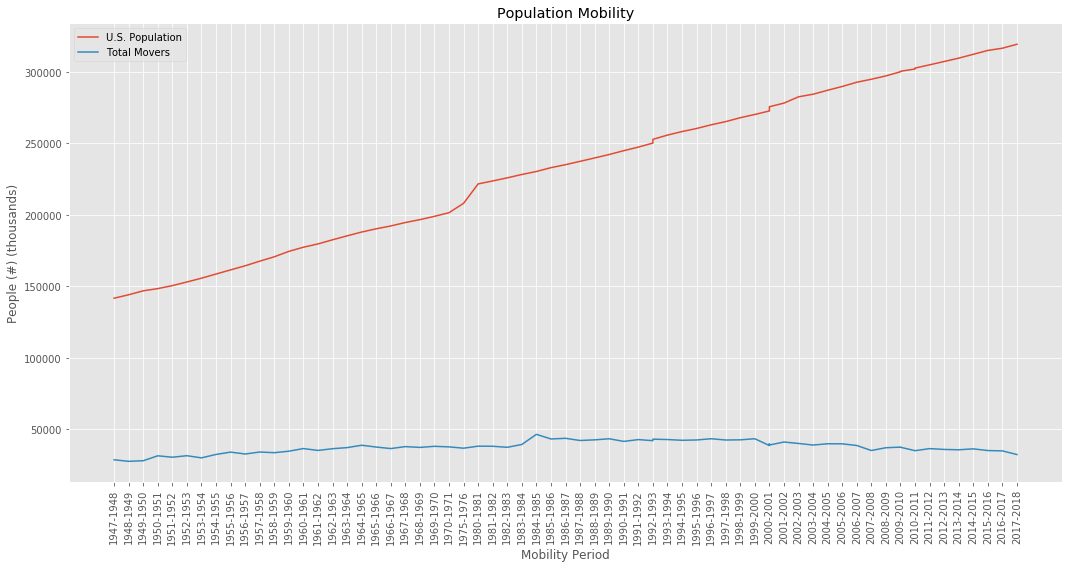

In [269]:
pyplt.style.use("ggplot")

fig1_a_1 = pyplt.figure()

x1 = df_a_1["l_Mobility_Period"]
y1 = df_a_1["l_Total 1 Year Old and Over"]
y2 = df_a_1["l_Total Movers"]

ax1 = fig1_a_1.add_subplot(111)
ax1.plot(x1, y1)
ax1.plot(x1, y2)

pyplt.xticks(rotation = 90)

pyplt.xlabel("Mobility Period")
ax1.invert_xaxis()

fig_size = [15, 8]
pyplt.rcParams["figure.figsize"] = fig_size

pyplt.ylabel("People (#) (thousands)")

pyplt.title("Population Mobility")

legend_labels = ["U.S. Population", "Total Movers"]
ax1.legend(labels = legend_labels)

fig1_a_1.tight_layout()

Graph: Absolute number and proportion of "movers" in the U.S. over time.

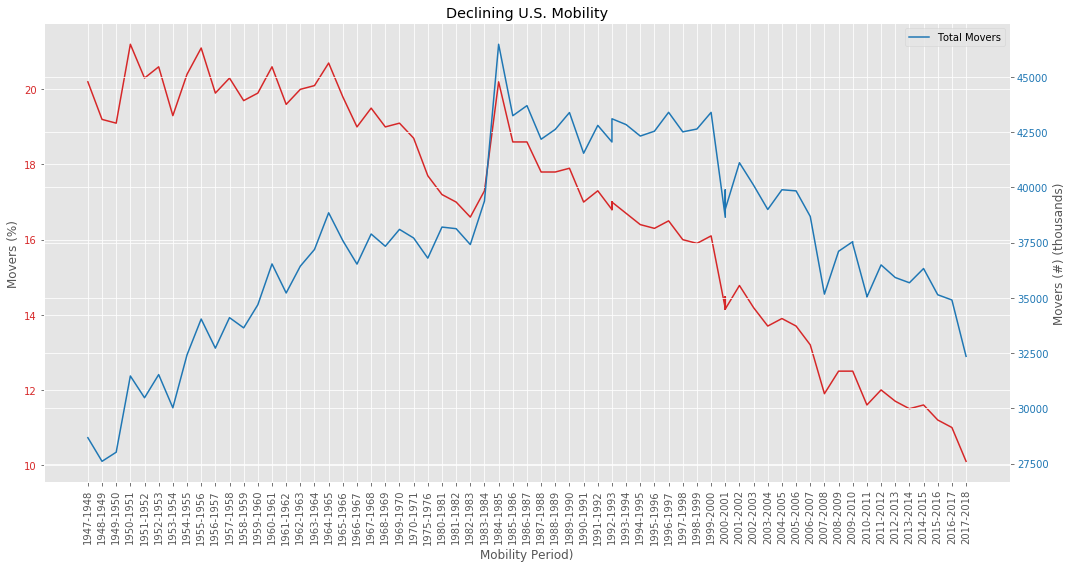

In [271]:
pyplt.style.use("ggplot")

fig1_a_1 = pyplt.figure()

x1 = df_a_1["l_Mobility_Period"]
y1 = df_a_1["r_Total Movers"]
y2 = df_a_1["l_Total Movers"]

ax1 = fig1_a_1.add_subplot(111)

color = "tab:red"
ax1.set_xlabel("Mobility Period)")
ax1.set_ylabel("Movers (%)")
ax1.plot(x1, y1, color = color)
ax1.tick_params(axis = "y", labelcolor = color)
ax1.invert_xaxis()

pyplt.xticks(rotation = 90)

ax2 = ax1.twinx()

color = "tab:blue"
ax2.set_xlabel("Mobility Period")
ax2.set_ylabel("Movers (#) (thousands)")
ax2.plot(x1, y2, color = color)
ax2.tick_params(axis = "y", labelcolor = color)

#lines, labels = ax1.get_legend_handles_labels()
#lines2, labels2 = ax2.get_legend_handles_labels()
#ax2.legend(lines + lines2, labels + labels2, loc=0)

legend_labels = ["Total Movers", "Population Adjusted"]
ax2.legend(labels = legend_labels)

fig_size[0] = 15
fig_size[1] = 8
pyplt.rcParams["figure.figsize"] = fig_size

pyplt.title("Declining U.S. Mobility")

fig1_a_1.tight_layout()

Absolute number of "movers" by type (magnitude) of move over time.

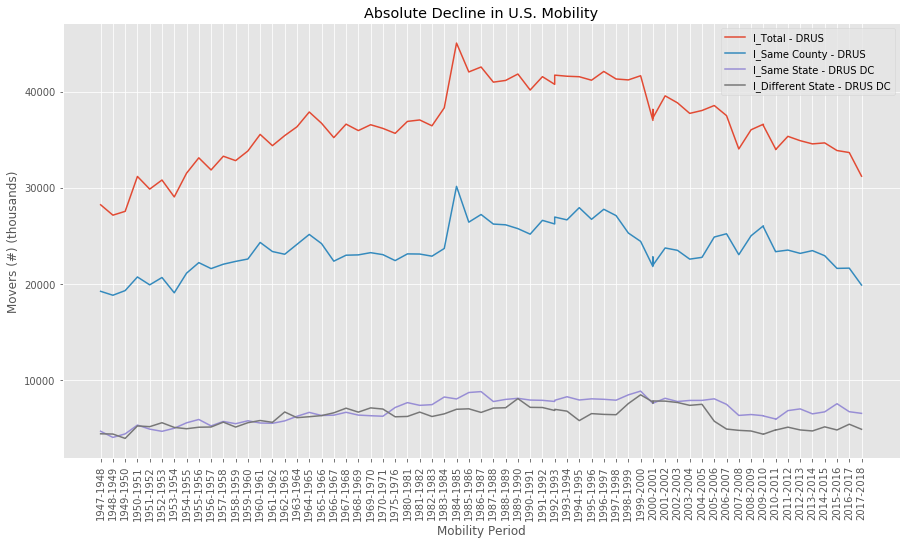

In [251]:
pyplt.style.use("ggplot")

fig2_a_1 = pyplt.figure()

x1 = df_a_1["l_Mobility_Period"]
y1 = df_a_1["l_Total - DRUS"]
y2 = df_a_1["l_Same County - DRUS"]
y3 = df_a_1["l_Same State - DRUS DC"]
y4 = df_a_1["l_Different State - DRUS DC"]


ax1 = fig2_a_1.add_subplot(111)

color = "tab:red"
ax1.set_xlabel("Mobility Period")
ax1.set_ylabel("Movers (#) (thousands)")
ax1.plot(x1, y1)
ax1.plot(x1, y2)
ax1.plot(x1, y3)
ax1.plot(x1, y4)
ax1.invert_xaxis()

pyplt.xticks(rotation = 90)

fig_size[0] = 15
fig_size[1] = 8
pyplt.rcParams["figure.figsize"] = fig_size

pyplt.title("Absolute Decline in U.S. Mobility")

pyplt.legend()

Proportion of population considered "movers" by type (magnitude) of move over time.

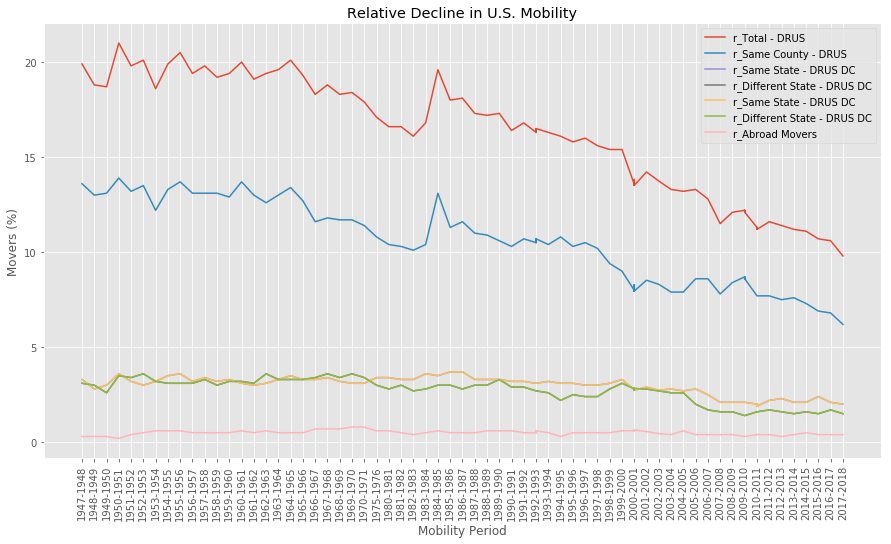

In [252]:
pyplt.style.use("ggplot")

fig2_a_1 = pyplt.figure()

x1 = df_a_1["l_Mobility_Period"]
y1 = df_a_1["r_Total - DRUS"]
y2 = df_a_1["r_Same County - DRUS"]
y3 = df_a_1["r_Same State - DRUS DC"]
y4 = df_a_1["r_Different State - DRUS DC"]


ax1 = fig2_a_1.add_subplot(111)

color = "tab:red"
ax1.set_xlabel("Mobility Period")
ax1.set_ylabel("Movers (%)")
ax1.plot(x1, y1)
ax1.plot(x1, y2)
ax1.plot(x1, y3)
ax1.plot(x1, y4)

ax1.invert_xaxis()

pyplt.xticks(rotation = 90)

fig_size[0] = 15
fig_size[1] = 8
pyplt.rcParams["figure.figsize"] = fig_size

pyplt.title("Relative Decline in U.S. Mobility")

pyplt.legend()

Compare absolute number of total movers (black line) and relative number of moves (colored lines) made by type (magnitude) of move over time.

/Users/John/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


NameError: name 'mylabels' is not defined

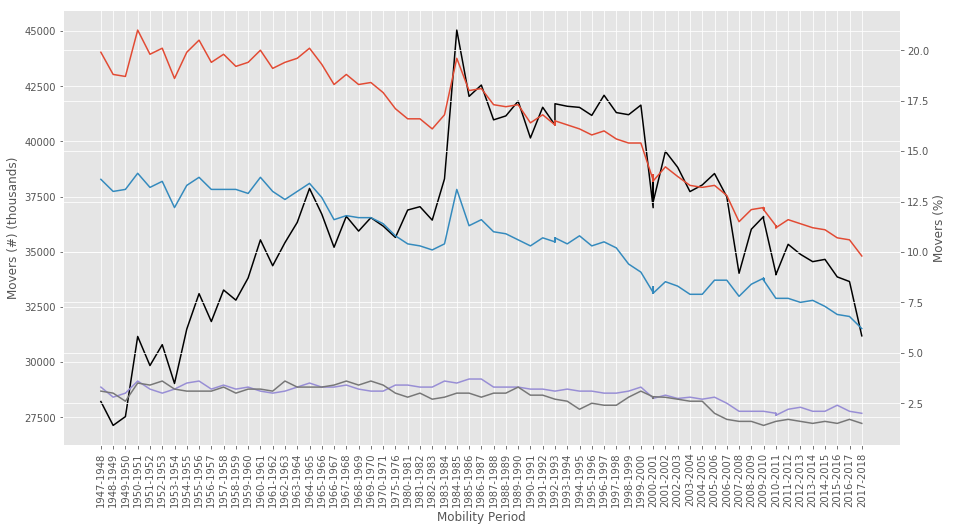

In [254]:
pyplt.style.use("ggplot")

fig2_a_1 = pyplt.figure()
pyplt.xticks(rotation = 90)

x1 = df_a_1["l_Mobility_Period"]
y1 = df_a_1["l_Total - DRUS"]
y2 = df_a_1["r_Total - DRUS"]
y3 = df_a_1["r_Same County - DRUS"]
y4 = df_a_1["r_Same State - DRUS DC"]
y5 = df_a_1["r_Different State - DRUS DC"]

ax1 = fig2_a_1.add_subplot(111)

color = "k"
ax1.set_xlabel("Mobility Period")
ax1.set_ylabel("Movers (#) (thousands)")
ax1.plot(x1, y1, color = color)
ax2.tick_params(axis = "y", labelcolor = color)

ax1.invert_xaxis()

ax2 = ax1.twinx()

color = "tab:blue"
ax2.set_xlabel("Mobility Period")
ax2.set_ylabel("Movers (%)")
ax2.plot(x1, y2)
ax2.plot(x1, y3)
ax2.plot(x1, y4)
ax2.plot(x1, y5)
ax2.tick_params(axis = "y")

legend_labels = [""]
ax2.legend(labels=mylabels)


lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc=0)

fig_size[0] = 15
fig_size[1] = 8
pyplt.rcParams["figure.figsize"] = fig_size

pyplt.title("US Population & Mobility")

Compare the changes of the relative number of moves by type over time.

In [234]:
df_a_1.loc[(df_a_1["l_Mobility_Period"] == "1975-1976") | (df_a_1["l_Mobility_Period"] == "1950-1951") | (df_a_1["l_Mobility_Period"] == "2010-2011")]

,l_Mobility_Period,l_Total 1 Year Old and Over,l_Same Residence - Non-Movers,l_Total Movers,l_Total - DRUS,l_Same County - DRUS,l_Total - DRUS DC,l_Same State - DRUS DC,l_Different State - DRUS DC,l_Abroad Movers,r_Same Residence - Non-Movers,r_Total Movers,r_Total - DRUS,r_Same County - DRUS,r_Total - DRUS DC,r_Same State - DRUS DC,r_Different State - DRUS DC,r_Abroad Movers
7,2010-2011,302640,267602,35038,33953,23330,10623,5868,4756,1084,88.4,11.6,11.2,7.7,3.5,1.9,1.6,0.4
8,2010-2011,302640,267602,35038,33953,23330,10623,5868,4756,1084,88.4,11.6,11.3,7.7,3.5,2.0,1.6,0.4
9,2010-2011,302005,266930,35075,34016,23325,10691,5912,4779,1058,88.4,11.6,11.2,7.7,3.5,1.9,1.6,0.4
10,2010-2011,302005,266930,35075,34016,23325,10691,5912,4779,1058,88.4,11.6,11.3,7.7,3.5,2.0,1.6,0.4
55,1975-1976,208069,171276,36793,35645,22399,13246,7106,6140,1148,82.3,17.7,17.1,10.8,6.4,3.4,3.0,0.6
76,1950-1951,148400,116936,31464,31158,20694,10464,5276,5188,306,78.8,21.2,21.0,13.9,7.1,3.6,3.5,0.2


<html><head>
</head>

<body>
<table cellspacing="0" border="0">
	<colgroup span="10" width="86"></colgroup>
	<tbody><tr>
		<td style="border-top: 1px solid #000000; border-bottom: 1px solid #000000; border-left: 1px solid #000000; border-right: 1px solid #000000" rowspan="3" height="79" align="center" valign="bottom"><font color="#000000">Mobility period</font></td>
		<td style="border-top: 1px solid #000000; border-bottom: 1px solid #000000; border-left: 1px solid #000000; border-right: 1px solid #000000" rowspan="3" align="center" valign="bottom"><font color="#000000">Total, 1 year old and over</font></td>
		<td style="border-top: 1px solid #000000; border-bottom: 1px solid #000000; border-left: 1px solid #000000; border-right: 1px solid #000000" rowspan="3" align="center" valign="bottom"><font color="#000000">Same residence (non-movers)</font></td>
		<td style="border-top: 1px solid #000000; border-bottom: 1px solid #000000; border-left: 1px solid #000000; border-right: 1px solid #000000" rowspan="3" align="center" valign="bottom"><font color="#000000">Total movers</font></td>
		<td style="border-top: 1px solid #000000; border-bottom: 1px solid #000000; border-right: 1px solid #000000" colspan="5" align="center" valign="bottom"><font color="#000000">Different residence in the United States</font></td>
		<td style="border-top: 1px solid #000000; border-bottom: 1px solid #000000; border-left: 1px solid #000000; border-right: 1px solid #000000" rowspan="3" align="center" valign="bottom"><font color="#000000">Movers from abroad</font></td>
	</tr>
	<tr>
		<td style="border-top: 1px solid #000000; border-bottom: 1px solid #000000; border-left: 1px solid #000000; border-right: 1px solid #000000" rowspan="2" align="center" valign="bottom"><font color="#000000">Total</font></td>
		<td style="border-top: 1px solid #000000; border-bottom: 1px solid #000000; border-left: 1px solid #000000; border-right: 1px solid #000000" rowspan="2" align="center" valign="bottom"><font color="#000000">Same county</font></td>
		<td style="border-bottom: 1px solid #000000; border-right: 1px solid #000000" colspan="3" align="center" valign="bottom"><font color="#000000">Different county</font></td>
		</tr>
	<tr>
		<td style="border-top: 1px solid #000000; border-bottom: 1px solid #000000; border-left: 1px solid #000000; border-right: 1px solid #000000" align="center" valign="bottom"><font color="#000000">Total</font></td>
		<td style="border-top: 1px solid #000000; border-bottom: 1px solid #000000; border-left: 1px solid #000000; border-right: 1px solid #000000" align="center" valign="bottom"><font face="Arial" size="2">Same state</font></td>
		<td style="border-top: 1px solid #000000; border-bottom: 1px solid #000000; border-left: 1px solid #000000; border-right: 1px solid #000000" align="center" valign="bottom"><font face="Arial" size="2">Different state</font></td>
		</tr>
	<tr>
		<td style="border-left: 1px solid #000000; border-right: 1px solid #000000" height="21" align="left" valign="bottom"><font face="Arial" size="2">2010-2011</font></td>
		<td style="border-left: 1px solid #000000; border-right: 1px solid #000000" align="right" valign="bottom" sdval="302005" sdnum="1033;0;#,##0"><font color="#000000">302,005</font></td>
		<td style="border-left: 1px solid #000000; border-right: 1px solid #000000" align="right" valign="bottom" sdval="266930" sdnum="1033;0;#,##0"><font color="#000000">266,930</font></td>
		<td style="border-left: 1px solid #000000; border-right: 1px solid #000000" align="right" valign="bottom" sdval="35075" sdnum="1033;0;#,##0"><font color="#000000">35,075</font></td>
		<td style="border-left: 1px solid #000000; border-right: 1px solid #000000" align="right" valign="bottom" sdval="34016" sdnum="1033;0;#,##0"><font color="#000000">34,016</font></td>
		<td style="border-left: 1px solid #000000; border-right: 1px solid #000000" align="right" valign="bottom" sdval="23325" sdnum="1033;0;#,##0"><font color="#000000">23,325</font></td>
		<td style="border-left: 1px solid #000000; border-right: 1px solid #000000" align="right" valign="bottom" sdval="10691" sdnum="1033;0;#,##0"><font color="#000000">10,691</font></td>
		<td style="border-left: 1px solid #000000; border-right: 1px solid #000000" align="right" valign="bottom" sdval="5912" sdnum="1033;0;#,##0"><font color="#000000">5,912</font></td>
		<td style="border-left: 1px solid #000000; border-right: 1px solid #000000" align="right" valign="bottom" sdval="4779" sdnum="1033;0;#,##0"><font color="#000000">4,779</font></td>
		<td style="border-left: 1px solid #000000; border-right: 1px solid #000000" align="right" valign="bottom" sdval="1058" sdnum="1033;0;#,##0"><font color="#000000">1,058</font></td>
	</tr>
	<tr>
		<td style="border-left: 1px solid #000000; border-right: 1px solid #000000" height="21" align="left" valign="bottom"><font face="Arial" size="2">2010-2011</font></td>
		<td style="border-left: 1px solid #000000; border-right: 1px solid #000000" align="right" valign="bottom" sdval="100" sdnum="1033;0;_(* #,##0.0_);_(* \(#,##0.0\);_(* &quot;-&quot;?_);_(@_)"><font color="#000000"> 100.0 </font></td>
		<td style="border-left: 1px solid #000000; border-right: 1px solid #000000" align="right" valign="bottom" sdval="88.4" sdnum="1033;0;_(* #,##0.0_);_(* \(#,##0.0\);_(* &quot;-&quot;?_);_(@_)"><font color="#000000"> 88.4 </font></td>
		<td style="border-left: 1px solid #000000; border-right: 1px solid #000000" align="right" valign="bottom" sdval="11.6" sdnum="1033;0;_(* #,##0.0_);_(* \(#,##0.0\);_(* &quot;-&quot;?_);_(@_)"><font color="#000000"> 11.6 </font></td>
		<td style="border-left: 1px solid #000000; border-right: 1px solid #000000" align="right" valign="bottom" sdval="11.3" sdnum="1033;0;_(* #,##0.0_);_(* \(#,##0.0\);_(* &quot;-&quot;?_);_(@_)"><font color="#000000"> 11.3 </font></td>
		<td style="border-left: 1px solid #000000; border-right: 1px solid #000000" align="right" valign="bottom" sdval="7.7" sdnum="1033;0;_(* #,##0.0_);_(* \(#,##0.0\);_(* &quot;-&quot;?_);_(@_)"><font color="#000000"> 7.7 </font></td>
		<td style="border-left: 1px solid #000000; border-right: 1px solid #000000" align="right" valign="bottom" sdval="3.5" sdnum="1033;0;_(* #,##0.0_);_(* \(#,##0.0\);_(* &quot;-&quot;?_);_(@_)"><font color="#000000"> 3.5 </font></td>
		<td style="border-left: 1px solid #000000; border-right: 1px solid #000000" align="right" valign="bottom" sdval="2" sdnum="1033;0;_(* #,##0.0_);_(* \(#,##0.0\);_(* &quot;-&quot;?_);_(@_)"><font color="#000000"> 2.0 </font></td>
		<td style="border-left: 1px solid #000000; border-right: 1px solid #000000" align="right" valign="bottom" sdval="1.6" sdnum="1033;0;_(* #,##0.0_);_(* \(#,##0.0\);_(* &quot;-&quot;?_);_(@_)"><font color="#000000"> 1.6 </font></td>
		<td style="border-left: 1px solid #000000; border-right: 1px solid #000000" align="right" valign="bottom" sdval="0.4" sdnum="1033;0;_(* #,##0.0_);_(* \(#,##0.0\);_(* &quot;-&quot;?_);_(@_)"><font color="#000000"> 0.4 </font></td>
	</tr>
	<tr>
		<td style="border-left: 1px solid #000000; border-right: 1px solid #000000" height="21" align="left" valign="bottom"><font face="Arial" size="2">1975-1976</font></td>
		<td style="border-left: 1px solid #000000; border-right: 1px solid #000000" align="right" valign="bottom" sdval="208069" sdnum="1033;0;#,##0"><font color="#000000">208,069</font></td>
		<td style="border-left: 1px solid #000000; border-right: 1px solid #000000" align="right" valign="bottom" sdval="171276" sdnum="1033;0;#,##0"><font color="#000000">171,276</font></td>
		<td style="border-left: 1px solid #000000; border-right: 1px solid #000000" align="right" valign="bottom" sdval="36793" sdnum="1033;0;#,##0"><font color="#000000">36,793</font></td>
		<td style="border-left: 1px solid #000000; border-right: 1px solid #000000" align="right" valign="bottom" sdval="35645" sdnum="1033;0;#,##0"><font color="#000000">35,645</font></td>
		<td style="border-left: 1px solid #000000; border-right: 1px solid #000000" align="right" valign="bottom" sdval="22399" sdnum="1033;0;#,##0"><font color="#000000">22,399</font></td>
		<td style="border-left: 1px solid #000000; border-right: 1px solid #000000" align="right" valign="bottom" sdval="13246" sdnum="1033;0;#,##0"><font color="#000000">13,246</font></td>
		<td style="border-left: 1px solid #000000; border-right: 1px solid #000000" align="right" valign="bottom" sdval="7106" sdnum="1033;0;#,##0"><font color="#000000">7,106</font></td>
		<td style="border-left: 1px solid #000000; border-right: 1px solid #000000" align="right" valign="bottom" sdval="6140" sdnum="1033;0;#,##0"><font color="#000000">6,140</font></td>
		<td style="border-left: 1px solid #000000; border-right: 1px solid #000000" align="right" valign="bottom" sdval="1148" sdnum="1033;0;#,##0"><font color="#000000">1,148</font></td>
	</tr>
	<tr>
		<td style="border-left: 1px solid #000000; border-right: 1px solid #000000" height="21" align="left" valign="bottom"><font face="Arial" size="2">1975-1976</font></td>
		<td style="border-left: 1px solid #000000; border-right: 1px solid #000000" align="right" valign="bottom" sdval="100" sdnum="1033;0;_(* #,##0.0_);_(* \(#,##0.0\);_(* &quot;-&quot;?_);_(@_)"><font color="#000000"> 100.0 </font></td>
		<td style="border-left: 1px solid #000000; border-right: 1px solid #000000" align="right" valign="bottom" sdval="82.3" sdnum="1033;0;_(* #,##0.0_);_(* \(#,##0.0\);_(* &quot;-&quot;?_);_(@_)"><font color="#000000"> 82.3 </font></td>
		<td style="border-left: 1px solid #000000; border-right: 1px solid #000000" align="right" valign="bottom" sdval="17.7" sdnum="1033;0;_(* #,##0.0_);_(* \(#,##0.0\);_(* &quot;-&quot;?_);_(@_)"><font color="#000000"> 17.7 </font></td>
		<td style="border-left: 1px solid #000000; border-right: 1px solid #000000" align="right" valign="bottom" sdval="17.1" sdnum="1033;0;_(* #,##0.0_);_(* \(#,##0.0\);_(* &quot;-&quot;?_);_(@_)"><font color="#000000"> 17.1 </font></td>
		<td style="border-left: 1px solid #000000; border-right: 1px solid #000000" align="right" valign="bottom" sdval="10.8" sdnum="1033;0;_(* #,##0.0_);_(* \(#,##0.0\);_(* &quot;-&quot;?_);_(@_)"><font color="#000000"> 10.8 </font></td>
		<td style="border-left: 1px solid #000000; border-right: 1px solid #000000" align="right" valign="bottom" sdval="6.4" sdnum="1033;0;_(* #,##0.0_);_(* \(#,##0.0\);_(* &quot;-&quot;?_);_(@_)"><font color="#000000"> 6.4 </font></td>
		<td style="border-left: 1px solid #000000; border-right: 1px solid #000000" align="right" valign="bottom" sdval="3.4" sdnum="1033;0;_(* #,##0.0_);_(* \(#,##0.0\);_(* &quot;-&quot;?_);_(@_)"><font color="#000000"> 3.4 </font></td>
		<td style="border-left: 1px solid #000000; border-right: 1px solid #000000" align="right" valign="bottom" sdval="3" sdnum="1033;0;_(* #,##0.0_);_(* \(#,##0.0\);_(* &quot;-&quot;?_);_(@_)"><font color="#000000"> 3.0 </font></td>
		<td style="border-left: 1px solid #000000; border-right: 1px solid #000000" align="right" valign="bottom" sdval="0.6" sdnum="1033;0;_(* #,##0.0_);_(* \(#,##0.0\);_(* &quot;-&quot;?_);_(@_)"><font color="#000000"> 0.6 </font></td>
	</tr>
	<tr>
		<td style="border-left: 1px solid #000000; border-right: 1px solid #000000" height="21" align="left" valign="bottom"><font color="#000000">1950-1951</font></td>
		<td style="border-left: 1px solid #000000; border-right: 1px solid #000000" align="right" valign="bottom" sdval="148400" sdnum="1033;0;#,##0"><font color="#000000">148,400</font></td>
		<td style="border-left: 1px solid #000000; border-right: 1px solid #000000" align="right" valign="bottom" sdval="116936" sdnum="1033;0;#,##0"><font color="#000000">116,936</font></td>
		<td style="border-left: 1px solid #000000; border-right: 1px solid #000000" align="right" valign="bottom" sdval="31464" sdnum="1033;0;#,##0"><font color="#000000">31,464</font></td>
		<td style="border-left: 1px solid #000000; border-right: 1px solid #000000" align="right" valign="bottom" sdval="31158" sdnum="1033;0;#,##0"><font color="#000000">31,158</font></td>
		<td style="border-left: 1px solid #000000; border-right: 1px solid #000000" align="right" valign="bottom" sdval="20694" sdnum="1033;0;#,##0"><font color="#000000">20,694</font></td>
		<td style="border-left: 1px solid #000000; border-right: 1px solid #000000" align="right" valign="bottom" sdval="10464" sdnum="1033;0;#,##0"><font color="#000000">10,464</font></td>
		<td style="border-left: 1px solid #000000; border-right: 1px solid #000000" align="right" valign="bottom" sdval="5276" sdnum="1033;0;#,##0"><font color="#000000">5,276</font></td>
		<td style="border-left: 1px solid #000000; border-right: 1px solid #000000" align="right" valign="bottom" sdval="5188" sdnum="1033;0;#,##0"><font color="#000000">5,188</font></td>
		<td style="border-left: 1px solid #000000; border-right: 1px solid #000000" align="right" valign="bottom" sdval="306" sdnum="1033;"><font color="#000000">306</font></td>
	</tr>
	<tr>
		<td style="border-left: 1px solid #000000; border-right: 1px solid #000000" height="21" align="left" valign="bottom"><font color="#000000">1950-1951</font></td>
		<td style="border-left: 1px solid #000000; border-right: 1px solid #000000" align="right" valign="bottom" sdval="100" sdnum="1033;0;_(* #,##0.0_);_(* \(#,##0.0\);_(* &quot;-&quot;?_);_(@_)"><font color="#000000"> 100.0 </font></td>
		<td style="border-left: 1px solid #000000; border-right: 1px solid #000000" align="right" valign="bottom" sdval="78.8" sdnum="1033;0;_(* #,##0.0_);_(* \(#,##0.0\);_(* &quot;-&quot;?_);_(@_)"><font color="#000000"> 78.8 </font></td>
		<td style="border-left: 1px solid #000000; border-right: 1px solid #000000" align="right" valign="bottom" sdval="21.2" sdnum="1033;0;_(* #,##0.0_);_(* \(#,##0.0\);_(* &quot;-&quot;?_);_(@_)"><font color="#000000"> 21.2 </font></td>
		<td style="border-left: 1px solid #000000; border-right: 1px solid #000000" align="right" valign="bottom" sdval="21" sdnum="1033;0;_(* #,##0.0_);_(* \(#,##0.0\);_(* &quot;-&quot;?_);_(@_)"><font color="#000000"> 21.0 </font></td>
		<td style="border-left: 1px solid #000000; border-right: 1px solid #000000" align="right" valign="bottom" sdval="13.9" sdnum="1033;0;_(* #,##0.0_);_(* \(#,##0.0\);_(* &quot;-&quot;?_);_(@_)"><font color="#000000"> 13.9 </font></td>
		<td style="border-left: 1px solid #000000; border-right: 1px solid #000000" align="right" valign="bottom" sdval="7.1" sdnum="1033;0;_(* #,##0.0_);_(* \(#,##0.0\);_(* &quot;-&quot;?_);_(@_)"><font color="#000000"> 7.1 </font></td>
		<td style="border-left: 1px solid #000000; border-right: 1px solid #000000" align="right" valign="bottom" sdval="3.6" sdnum="1033;0;_(* #,##0.0_);_(* \(#,##0.0\);_(* &quot;-&quot;?_);_(@_)"><font color="#000000"> 3.6 </font></td>
		<td style="border-left: 1px solid #000000; border-right: 1px solid #000000" align="right" valign="bottom" sdval="3.5" sdnum="1033;0;_(* #,##0.0_);_(* \(#,##0.0\);_(* &quot;-&quot;?_);_(@_)"><font color="#000000"> 3.5 </font></td>
		<td style="border-left: 1px solid #000000; border-right: 1px solid #000000" align="right" valign="bottom" sdval="0.2" sdnum="1033;0;_(* #,##0.0_);_(* \(#,##0.0\);_(* &quot;-&quot;?_);_(@_)"><font color="#000000"> 0.2 </font></td>
	</tr>
</tbody></table>
<!-- ************************************************************************** -->



</body></html>

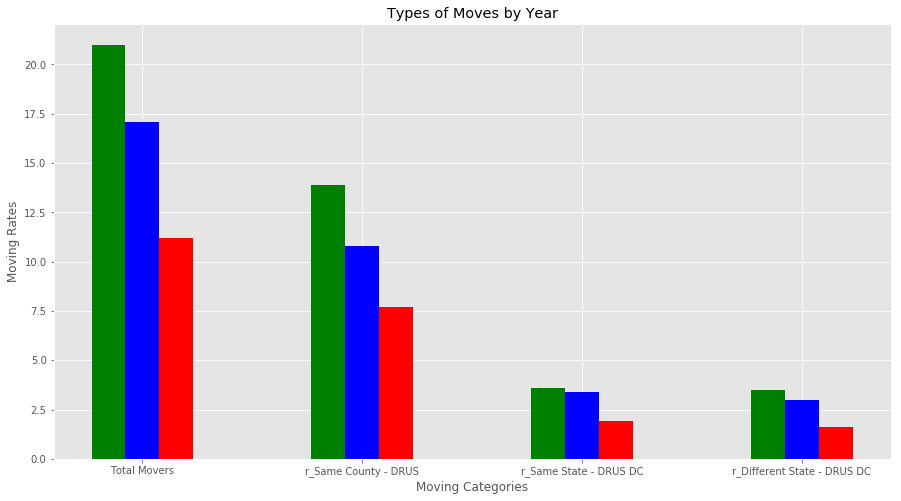

In [266]:
pyplt.style.use('ggplot')

fig3_a_1 = pyplt.figure()

x = ["Total Movers",
     "r_Same County - DRUS", 
     "r_Same State - DRUS DC",
     "r_Different State - DRUS DC",]

list_1950 = df_a_1.loc[df_a_1["l_Mobility_Period"] == "1950-1951"].values.tolist()
y1 = [list_1950[0][12],
     list_1950[0][13],
     list_1950[0][15],
     list_1950[0][16]
    ]

list_1975 = df_a_1.loc[df_a_1["l_Mobility_Period"] == "1975-1976"].values.tolist()
y2 = [list_1975[0][12],
     list_1975[0][13],
     list_1975[0][15],
     list_1975[0][16]
    ]

list_2010 = df_a_1.loc[df_a_1["l_Mobility_Period"] == "2010-2011"].values.tolist()
y3 = [list_2010[0][12],
     list_2010[0][13],
     list_2010[0][15],
     list_2010[0][16]
    ]
     
x_pos_1 = [i*1.3 - 0.2 for i, _ in enumerate(x)]
x_pos_2 = [i*1.3 for i, _ in enumerate(x)]
x_pos_3 = [i*1.3 + 0.2 for i, _ in enumerate(x)]
width = 0.2

pyplt.bar(x_pos_1, y1, width = width, color = "green", align = "center")
pyplt.bar(x_pos_2, y2, width = width, color = "blue", align = "center")
pyplt.bar(x_pos_3, y3, width = width, color = "red", align = "center")
pyplt.xlabel("Moving Categories")
pyplt.ylabel("Moving Rates")
pyplt.title("Types of Moves by Year")

pyplt.xticks(x_pos_2, x)

pyplt.show()

In [262]:
x_pos_1


[-0.2, 0.8, 1.8, 2.8]